In [9]:
%run sunny.py

In [2]:
import scipy.signal as scp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
df = pd.read_table('data/dst.dat', sep="\s+")
data = df.groupby("DATE").mean().reset_index()
data

,DATE,DOY,Dst
0,1958-01-01,1.0,-98.250000
1,1958-01-02,2.0,-59.708333
2,1958-01-03,3.0,-28.250000
3,1958-01-04,4.0,-11.583333
4,1958-01-05,5.0,1.166667
...,...,...,...
20814,2014-12-27,361.0,-31.125000
20815,2014-12-28,362.0,-16.583333
20816,2014-12-29,363.0,-23.541667
20817,2014-12-30,364.0,-29.166667


In [4]:
imit = np.array(imitate_Dst(Num = 20818, p = 0.85, A_sin = 1.53, D_1 = 12, only_sin = True, D_2 = 8, A_sin2 = 1))

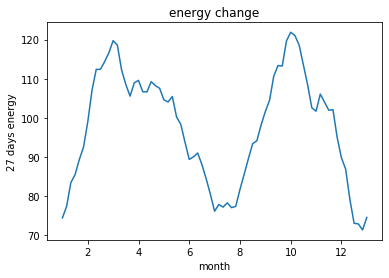

1

In [6]:
get_energys(imit, np.array(range(20819)) % 365 + 1, draw = True)
1

NameError: name 'en1s2' is not defined

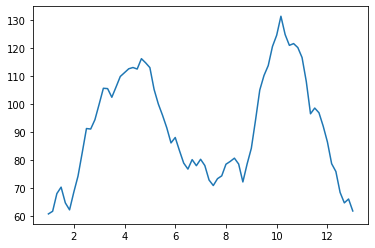

In [8]:
draw_two(data["Dst"], data["DOY"], imit, np.array(range(20819)) % 365 + 1)

Построение графика для послед fft

In [29]:
en1s = []
en2s = []
rels = []
for i in range(73):
    filt(data, 1 + i * 5, 30)
    _, en1, en2, rel= mFFTe(data["filted"], norm = data["filt"].sum())
    en1s.append(en1)
    en2s.append(en2)
    rels.append(rel)

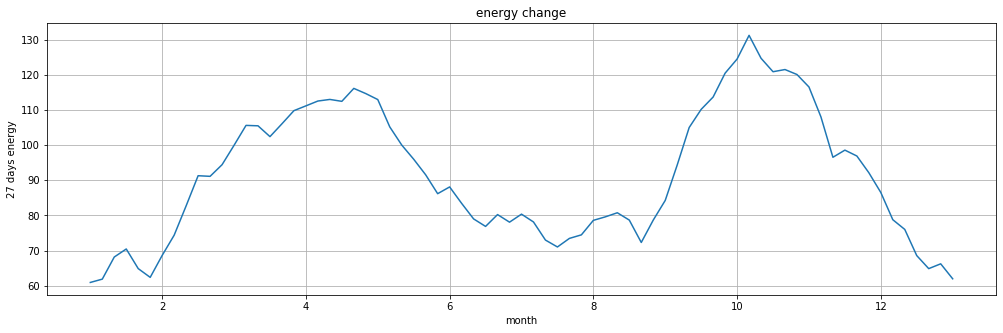

In [30]:
plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
plt.xlabel("month")
plt.ylabel("27 days energy")
plt.title("energy change")
plt.show()

In [31]:
def data_checker(name = 'to_send085.csv'):
    ts = pd.read_csv(name)
    ts["DOY"] = ts["Unnamed: 0"]
    ts["DOY"] = ts["DOY"] % 365 + 1
    #ts["Dst"] = ts["0"]
    
    
    en1s = []
    en2s = []
    rels = []
    for i in range(73):
        filt(data, 1 + i * 5, 30)
        en1, en2, rel, _ = mFFT(data["filted"], draw = False, x1 = 20, x2 = 40, norm = data["filt"].sum(), energy = True, wr = False)
        en1s.append(en1)
        en2s.append(en2)
        rels.append(rel)
        
    plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
    plt.xlabel("month")
    plt.ylabel("27 days energy")
    plt.title("dst energy change")
    plt.show()
    
    en1s = []
    en2s = []
    rels = []
    for i in range(73):
        filt(ts, 1 + i * 5, 30)
        en1, en2, rel, _ = mFFT(ts["filted"], draw = False, x1 = 20, x2 = 40, norm = data["filt"].sum(), energy = True, wr = False)
        en1s.append(en1)
        en2s.append(en2)
        rels.append(rel)
        
        
    plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
    plt.xlabel("month")
    plt.ylabel("27 days energy")
    plt.title("test energy change")
    plt.show()

In [32]:
def mFFT2(arr, p1, p2, norm = -1):


    if norm == -1:
        norm = len(arr)
        
    
    A = np.fft.rfft((arr - np.mean(arr)) / norm)
    n = np.arange(len(A) + 1)
    n1 = len(arr) / n[1:]
    return np.max(np.abs(A)[(p1 <= n1) & (n1 <= p2)])

In [36]:
len(data)

20819

In [81]:
am = 5
d = 1
filt(data, 266, 30)

for i in range(100):
    if (i % 10 == 9):
        print("\r", i, end = "")
    data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = am, D_1 = 0)
    filtSim(data, 266, 30)
    nsim = mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())
    n = mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())
    if (n > nsim):
        am += d
    else:
        am -= d
    d *= 0.9
am

 99

1.695094621128918

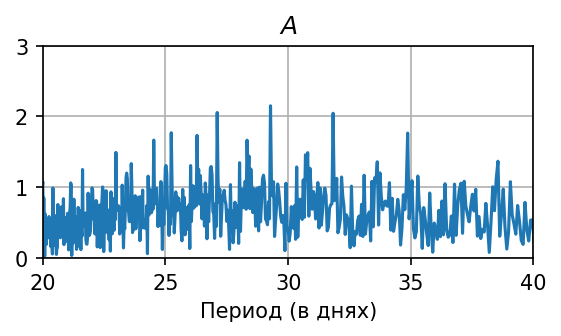

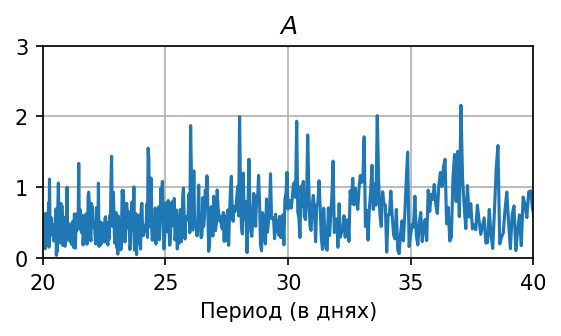

(2.1498813577620766, 2.1578220005440745)

In [87]:
data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = am, D_1 = 10)
filtSim(data, 266, 30)
mFFT(data["filted"], x1 = 20, x2 = 40, y2 = 3, draw = True, norm = data["filt"].sum(), of1 = True)
mFFT(data["fsim"], x1 = 20, x2 = 40, y2 = 3, draw = True, norm = data["filt"].sum(), of1 = True)
nsim = mFFT2(data["fsim"], 20, 40, norm = data["filt"].sum())
n = mFFT2(data["filted"], 20, 40, norm = data["filt"].sum())
n, nsim

In [88]:
am = 5
d = 1
filt(data, 81, 30)

for i in range(100):
    if (i % 10 == 9):
        print("\r", i, end = "")
    data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = am, D_1 = 0)
    filtSim(data, 81, 30)
    nsim = mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())
    n = mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())
    if (n > nsim):
        am += d
    else:
        am -= d
    d *= 0.9
am

 99

1.375888139441839

In [90]:
am = (1.375888139441839 + 1.695094621128918) / 2
am

1.5354913802853785

In [92]:
am = 3
d = 1
filt(data, 174, 30)

for i in range(100):
    if (i % 10 == 9):
        print("\r", i, end = "")
    data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = 1.53, D_1 = 0, only_sin = True, D_2 = 0, A_sin2 = am)
    filtSim(data, 174, 30)
    nsim = mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())
    n = mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())
    if (n > nsim):
        am += d
    else:
        am -= d
    d *= 0.9
am

 99

0.9694798314145057

In [96]:
am = 3
d = 1
filt(data, 357, 30)

for i in range(100):
    if (i % 10 == 9):
        print("\r", i, end = "")
    data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = 1.53, D_1 = 0, only_sin = True, D_2 = 0, A_sin2 = am)
    filtSim(data, 357, 30)
    nsim = mFFT2(data["fsim"], 20, 40, norm = data["filt"].sum())
    n = mFFT2(data["filted"], 20, 40, norm = data["filt"].sum())
    if (n > nsim):
        am += d
    else:
        am -= d
    d *= 0.9
am

 99

1.1182561263802004

In [97]:
am = (1.1182561263802004 + 0.9694798314145057) / 2
am

1.043867978897353

 199

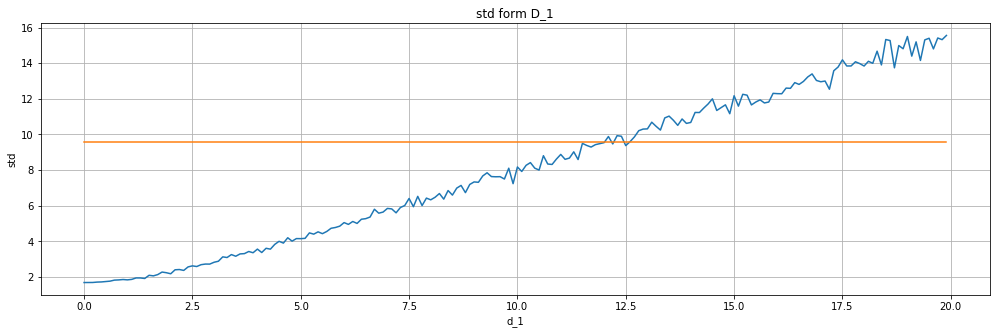

In [120]:
ar = []
ar2 = []
filt(data, 81, 30)
for i in range(200):
    print("\r", i, end = "")
    data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = 1.53, D_1 = 0.1 * i)
    filtSim(data, 81, 30)
    ar.append(np.std(data["fsim"]))
    ar2.append(np.std(data["filted"]))
    
plt.plot(np.array(range(200)) * 0.1, ar)
plt.plot(np.array(range(200)) * 0.1, ar2)
plt.xlabel("d_1")
plt.ylabel("std")
plt.title("std form D_1")
plt.show()

In [143]:
data["sim"] = imitate_Dst(Num = len(data) - 1, p = 0.85, A_sin = 1.53, D_1 = 12, only_sin = True, D_2 = 8, A_sin2 = 1)

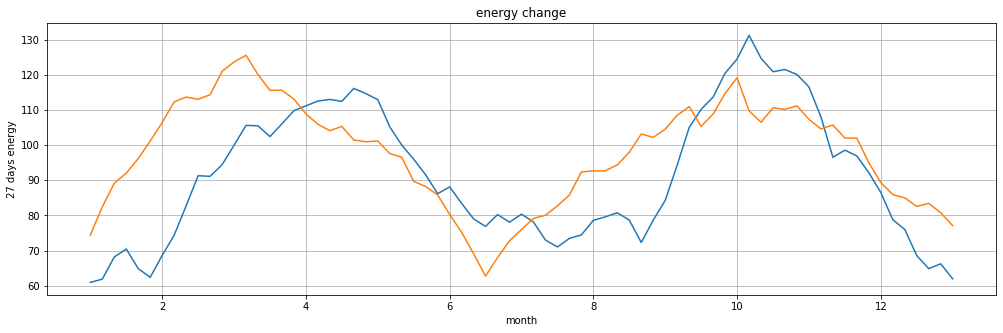

In [144]:
en1s = []
en2s = []
rels = []
for i in range(73):
    filt(data, 1 + i * 5, 30)
    _, en1, en2, rel= mFFTe(data["filted"], norm = data["filt"].sum())
    en1s.append(en1)
    en2s.append(en2)
    rels.append(rel)
    
en1s2 = []
en2s2 = []
rels2 = []
for i in range(73):
    filtSim(data, 1 + i * 5, 30)
    _, en1, en2, rel= mFFTe(data["fsim"], norm = data["filt"].sum())
    en1s2.append(en1)
    en2s2.append(en2)
    rels2.append(rel)
    
plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
plt.plot( np.arange(1, 13.1, 1 / 6), en1s2)
plt.xlabel("month")
plt.ylabel("27 days energy")
plt.title("energy change")
plt.show()

In [150]:
def get_energys(data, doys, draw = False):
    en1s = []
    en2s = []
    rels = []
    for i in range(73):
        day = 1 + i * 5
        rad = 30
        filt = (((doys - day) % 365) <= rad) | ((doys - day) % 365 >= 365 - rad)
        filted = data * filt + (1 - filt) * data.mean()
        _, en1, en2, rel= mFFTe(filted, norm = filt.sum())
        en1s.append(en1)
        en2s.append(en2)
        rels.append(rel)
    if (draw):
        plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
        plt.xlabel("month")
        plt.ylabel("27 days energy")
        plt.title("energy change")
        plt.show()
    return en1s

def draw_two(data1, doys1, data2, doys2):
    en1s = get_energys(data1, doys1)
    en2s = get_energys(data2, doys2)
    plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
    plt.plot( np.arange(1, 13.1, 1 / 6), en1s2)
    plt.xlabel("month")
    plt.ylabel("27 days energy")
    plt.title("energy change")
    plt.show()
    

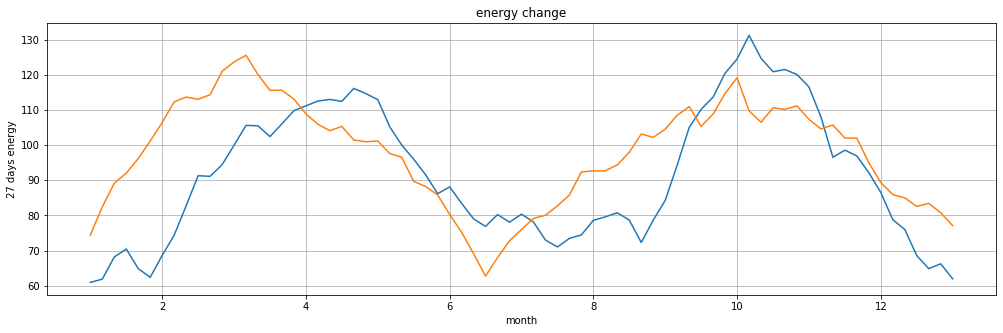

In [155]:
draw_two(data["Dst"], data["DOY"], data["sim"], np.array(range(len(data))) % 365 + 1)


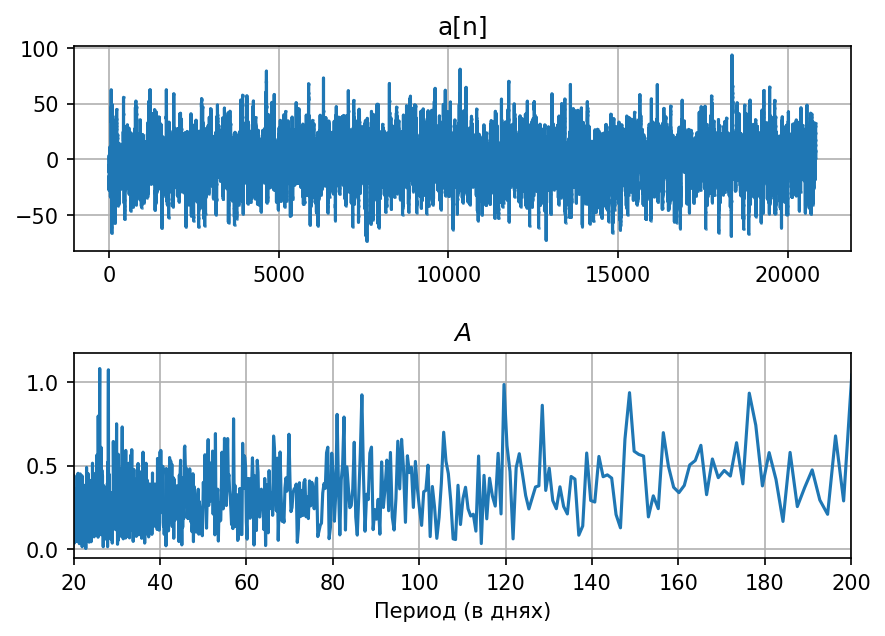

array([3.46944695e-16, 7.44969215e-01, 6.87721383e-01, ...,
       4.36784320e-02, 3.81676779e-02, 3.76400392e-02])

In [142]:
mFFT(data["sim"], draw = True, x1 = 20, x2 = 200)